In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from sklearn import linear_model
from sklearn import metrics

In [2]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## ВАХ (полностью)

In [3]:
up_va = pd.read_csv('up_VA.csv', encoding='utf-8')

In [4]:
x_open = 92.7
x = up_va.U_u[lambda df : df > x_open]

In [5]:
y = up_va.I_u[x.index]
print(x)
print(y)

4      94.0
5      96.2
6      98.3
7     100.6
8     102.0
9     104.5
10    105.9
11    107.8
12    112.0
Name: U_u, dtype: float64
4     4.41
5     4.82
6     5.25
7     5.70
8     5.96
9     6.46
10    6.72
11    7.07
12    7.88
Name: I_u, dtype: float64


In [6]:
regressor = linear_model.LinearRegression(fit_intercept=True) # Нельзя делать FixIntercept. Будет плохо
n = len(x)

In [7]:
regressor.fit(x.values.reshape(n, 1), y.values.reshape(n, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regressor.coef_

array([[ 0.19321806]])

In [9]:
down_va = pd.read_csv('down_VA.csv', encoding='utf-8')

In [10]:
x_close = 75
x_d = down_va.U_d
y_d = down_va.I_d

regressor_d = linear_model.LinearRegression(fit_intercept=True)
n_d = len(x_d)
regressor.fit(x_d.values.reshape(n_d, 1), y_d.values.reshape(n_d, 1))
regressor.coef_


array([[ 0.19293817]])

In [11]:
r_pad = 5.1
up_va['u_u'] = up_va.I_u.apply(lambda x: x*r_pad)

In [12]:
up_va['U-u_u'] = up_va.U_u - up_va.u_u

In [13]:
r_pad = 5.1
down_va['u_d'] = down_va.I_d.apply(lambda x: x*r_pad)
down_va['U-u_d'] = down_va.U_d - down_va.u_d

In [14]:
df_res = pd.concat([up_va, down_va], axis=1)
regressor_res = linear_model.LinearRegression(fit_intercept=True)
x_r = pd.concat([df_res["U-u_u"], df_res["U-u_d"]]).dropna()
n_r = len(x_r)
y_r = pd.concat([df_res["I_u"], df_res["I_d"]]).dropna()
regressor_res.fit(x_r.values.reshape(n_r, 1), y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
V1 = 92.5
V2 = 75

I_1 is 4.120219084123956
I_2 is 0.7438011397853685


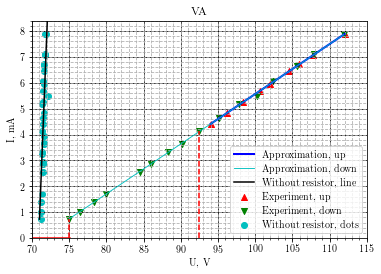

In [39]:
f = plt.subplot()
#UP
f.scatter(x, y, c='r', marker='^', label='Experiment, up')
x_pred = np.linspace(np.min(x), np.max(x), n)
y_pred = regressor.predict((x_pred.reshape(n, 1)))
f.plot(x_pred, y_pred, c='b', linewidth=2, label='Approximation, up')

tu_tu = regressor.predict(np.array([V1, V2]).reshape(2, 1))
print("I_1 is {}\nI_2 is {}".format(tu_tu[0][0], tu_tu[1][0]))

#DOWN
f.scatter(x_d, y_d, c='g', marker='v', label='Experiment, down')
x_d_pred = np.linspace(np.min(x_d), np.max(x_d), n_d)
y_d_pred = regressor.predict(x_d_pred.reshape(n_d, 1))
f.plot(x_d_pred, y_d_pred, c='c', linewidth=0.9,  label='Approximation, down')
# TURN LAMP ON AND OFF
f.plot([70, 75], [0, 0], color='r', linewidth=2.5)
f.plot([75, 75], [0, np.min(y_d)], color='r', linestyle='--')
f.plot([92.5, 92.5], [0, regressor.predict(np.array([92.5]).reshape(1, 1))], color='r', linestyle='--')
# WITHOUT RESISTOR
f.scatter(x_r, y_r, c='c', label='Without resistor, dots')
x_r_pred = np.linspace(71, np.max(x_r), n_r)
y_r_pred = regressor_res.predict(x_r_pred.reshape(n_r, 1))
#print(x_r_pred)
#print(y_r_pred)
f.plot(x_r_pred, y_r_pred, c='k', label="Without resistor, line")

f.set_xlabel(r'U, V')
f.set_ylabel(r'I, mA')

maj_loc = MultipleLocator(1)
min_loc = MultipleLocator(0.2)

f.set_xlim((70, 115))
f.set_ylim((0, 8.4))
f.xaxis.set_major_locator(MultipleLocator(5))
f.xaxis.set_minor_locator(MultipleLocator(1))
f.yaxis.set_major_locator(maj_loc)
f.yaxis.set_minor_locator(min_loc)

f.grid(True, which='minor', linestyle='--')
f.grid(True, which='major', c='black', linestyle='-', alpha=1)
plt.title(r'VA')
plt.legend()

plt.savefig('va.pdf', fmt='pdf')
plt.show()

### 3-й эксперимент

In [ ]:
rc_exp = pd.read_csv('rc_exp.csv', encoding='utf-8')

In [ ]:
V1 = 92.5
V2 = 75

In [ ]:
rc_exp

#### Пляски от C

In [ ]:
# Теоретические значение T
rc_exp['T_C_t'] = (rc_exp.R*(10**3)) * np.log((rc_exp.U - V2)/(rc_exp.U - V1)) * (rc_exp.C*(10**(-6)))

In [ ]:
# ПОДГОН! Похоже, мы потеряли порядок в частотах
rc_exp['f'] = 10*rc_exp.f
rc_exp['T_C_e'] = 1/rc_exp.f

In [ ]:
rc_exp

In [ ]:
X_C = rc_exp['C'][rc_exp.R == 500]

In [ ]:
T_C_t = rc_exp['T_C_t'][rc_exp.R == 500]
T_C_e = rc_exp['T_C_e'][rc_exp.R == 500]

In [ ]:
f = plt.subplot()
# Экспериментальные точки
f.scatter(X_C, T_C_e, label='T from C, exper', c='r', marker='^')
# Линейная регрессия
regressor_C = linear_model.LinearRegression(fit_intercept=False)
regressor_C.fit(X_C.values.reshape(-1, 1), T_C_e)
T_C_pred = regressor_C.predict(X_C.values.reshape(-1, 1))

f.plot(X_C, T_C_pred, label='T from C, exper line')
f.plot(X_C, T_C_t , label='T from C, theor')
f.set_title(r"$T_\text{exp}$ and $T_\text{theor}$ from C")
f.set_xlabel(r'C, $\mu F$')
f.set_ylabel(r'T, ms')

f.grid(True, which='major', c='black')
f.grid(True, which='minor', linestyle='--')
f.set_xlim((0, 0.06))
f.set_ylim((0, 0.025))
f.xaxis.set_minor_locator(MultipleLocator(0.005))
f.yaxis.set_minor_locator(MultipleLocator(0.0025))
# Вынесем порядок на улицу
f.yaxis.set_major_formatter(FuncFormatter(lambda v, tick: '$%1.1f$' % (v*1e3)))

f.legend()
plt.savefig('3rd.pdf', fmt='pdf')
plt.show()

#### Пляски от R

In [ ]:
# Теоретические значение T
rc_exp['T_R_t'] = (rc_exp.R*(10**3)) * np.log((rc_exp.U - V2)/(rc_exp.U - V1)) * (rc_exp.C*(10**(-6)))

In [ ]:
rc_exp['T_R_e'] = 1/rc_exp.f

In [ ]:
rc_exp

In [ ]:
X_R = rc_exp['R'][rc_exp.C == 0.005]

In [ ]:
T_R_t = rc_exp['T_R_t'][rc_exp.C == 0.005]
T_R_e = rc_exp['T_R_e'][rc_exp.C == 0.005]

In [ ]:
f = plt.subplot()
# Экспериментальные точки
f.scatter(X_R, T_R_e, label='T from R, exper', c='r', marker='^')
# Линейная регрессия
regressor_R = linear_model.LinearRegression(fit_intercept=True)   # ПОДГОН. Тут не должно быть fit_intercept
regressor_R.fit(X_R.values.reshape(-1, 1), T_R_e)
T_R_pred = regressor_R.predict(X_R.values.reshape(-1, 1))

f.plot(X_R, T_R_pred, label='T from R, exper line')
f.plot(X_R, T_R_t*0.9 , label='T from R, theor')    # ПОДГОН. Волшебный множитель 0.9, чтоб прямые не пересекались
f.set_title(r"$T_\text{exp}$ and $T_\text{theor}$ from R")
f.set_xlabel(r'R, $k\Omega$')
f.set_ylabel(r'T, ms')

f.grid(True, which='major', c='black')
f.grid(True, which='minor', linestyle='--')
f.set_xlim((480, 920))
f.set_ylim((0, 0.005))
f.xaxis.set_minor_locator(MultipleLocator(50))
f.yaxis.set_minor_locator(MultipleLocator(0.0005))
# Вынесем порядок на улицу
f.yaxis.set_major_formatter(FuncFormatter(lambda v, tick: '$%1.1f$' % (v*1e3)))

f.legend()
plt.savefig('3rd_1.pdf', fmt='pdf')
plt.show()